# tutorial
1. have to perceive smg weird
2. visualizing
3. model(classification)
4. comparison
5. let's see how GridSearch works!

# i refered these codes
> thanks so much
1. https://www.kaggle.com/code/ahmadmakhdoomi/apple-quality-prediction-4-models
2. https://www.kaggle.com/code/adamlion/apple-quality
3. https://www.kaggle.com/code/arehman123/knn-model-apple-quality
4. https://www.kaggle.com/code/rashidafazal/an-introduction-to-apple-quality-data
5. https://www.kaggle.com/code/mytran/hyperparameter-tuning-91-accuracy-on-test-set

In [62]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/apple-quality/apple_quality.csv


In [69]:
apple_quality_df = pd.read_csv('/kaggle/input/apple-quality/apple_quality.csv', encoding = 'utf-8')
a = apple_quality_df

# 1. have to perceive smg weird

In [70]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


### look above, the rest are 4000, Acidity is `4001`! and also consider dtypes

In [71]:
a.head(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


### everything seems numerical, except the last col, but why Acidity is object? there must be smg wrong

In [72]:
a.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

###  i guess in `Acidity`, the rest of 4000/4001 row's are numeric and the last one is a cat, thats why it's changed to categorical 

In [73]:
nan_rows = a[a.isna().any(axis=1)]
nan_rows

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


## ok this is it, i'mma rebuild my DataFrame

In [74]:
a = a[a['Acidity'] != 'Created_by_Nidula_Elgiriyewithana']
a.info()
# look down below every rows are 4000

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [75]:
a.info
# check out down below

<bound method DataFrame.info of         A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3995  3995.0  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571

In [76]:
a.duplicated().sum() # 0
a.drop("A_id", axis=1, inplace=True)
a.dropna(axis = 0, inplace=True)
a.shape

(4000, 8)

In [77]:
# Acidity (col --> num)
a['Acidity'] = pd.to_numeric(a['Acidity'], errors = 'coerce')
a.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [5]:
# errors='coerce' --> changing unreadable data because of cat --> to NaN
#ex) --> data = {'Column1': ['1', '2', 'three', '4', 'five']}

# 0      1.0
# 1      2.0
# 2      NaN
# 3      4.0
# 4      NaN

In [78]:
# don't get confused
# the reason why dtypes are int64 is because it's showing total nums of `good` and `bad`
a['Quality'].value_counts(ascending=False)

Quality
good    2004
bad     1996
Name: count, dtype: int64

In [79]:
# Quality's value(cat_binary ---> int_binary)
def binary_Q(item):
    if item == 'good':
        return 1.0
    else: 
        return 0.0

a['Quality'] = a['Quality'].apply(lambda k: binary_Q(k))
a['Quality'].value_counts(ascending=False)

Quality
1.0    2004
0.0    1996
Name: count, dtype: int64

In [80]:
# you can check it out, whether it's got a change
a['Quality'].dtypes # dtype('float64')
a.info

<bound method DataFrame.info of           Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0    -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1    -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2    -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3    -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...        ...       ...        ...          ...        ...       ...   
3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity  Quality  
0    -0.491590      1.0  
1    -0.722809      1.0  
2     2.62163

In [23]:
a.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

# 2. visualizing

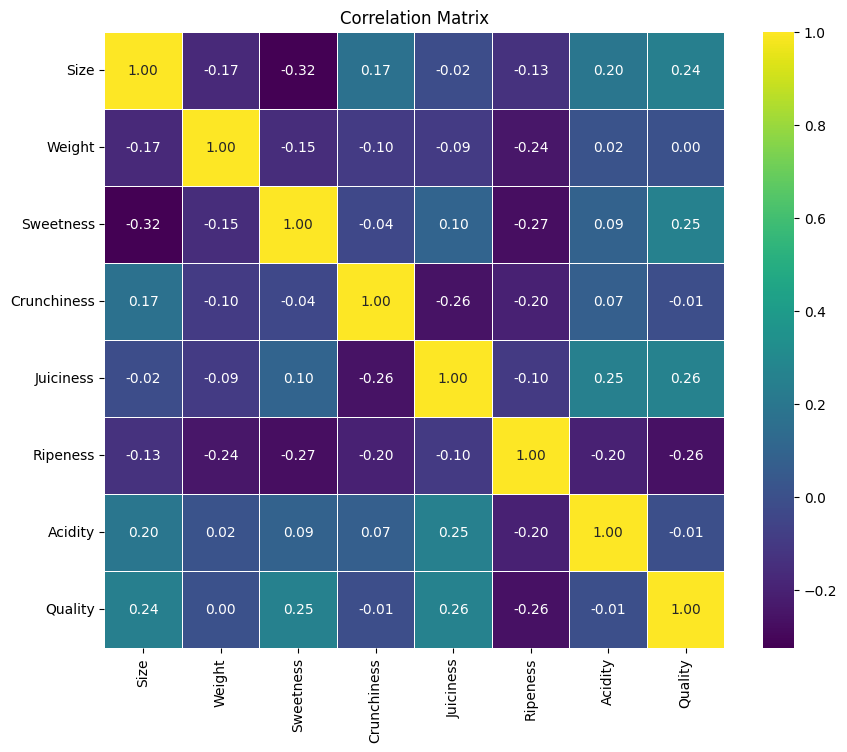

In [24]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = a.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, fmt = '0.2f', cmap = 'viridis', linewidth = 0.5)
plt.title('Correlation Matrix')
plt.show()

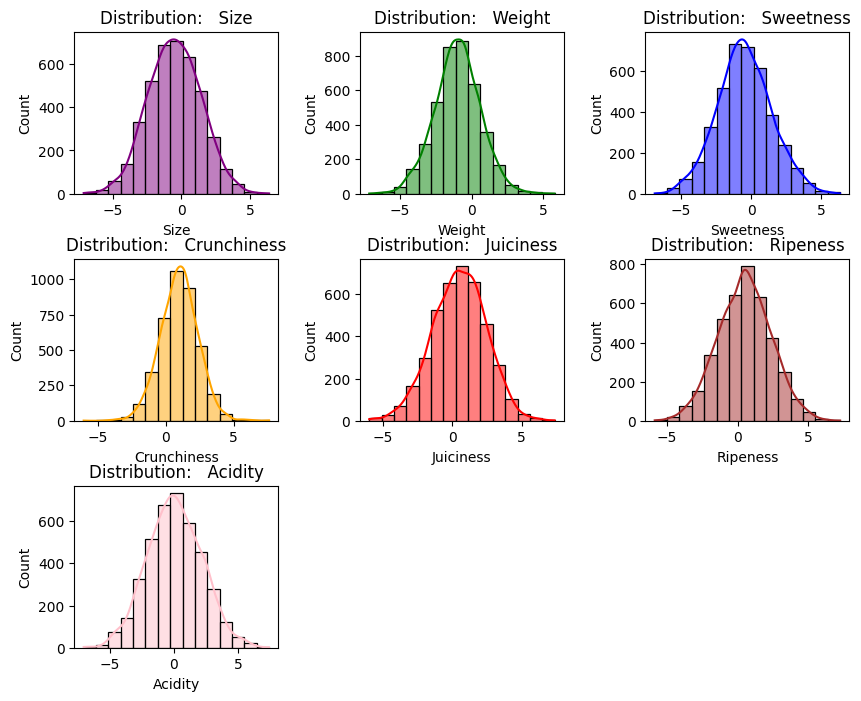

In [25]:
columns = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
colors = ['purple', 'green', 'blue', 'orange', 'red', 'brown', 'pink']

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# setting size of graph
plt.figure(figsize=(10, 8))

# adjusting margin
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i, col in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=a, x=col, kde=True, bins=15, color=colors[i])
    plt.title(f'Distribution:   {col}')  

plt.show()
 # kde = True --> (using a sub line)


# kurtosis > 0
# 정규 분포보다 중심 부분에 더 많은 데이터가 있다 (most of the datas are at the top part)
# 꼬리(꼭대기 쪽)에 더 많은 극단값(outlier)을 가지고 있다.

# kurtosis < 0
# 데이터는 정규 분포보다 중심 부분에 덜 데이터를 가지고 있다
# 꼬리에 더 극단값이 적습니다.(there're not a lot of outliers at the top part)

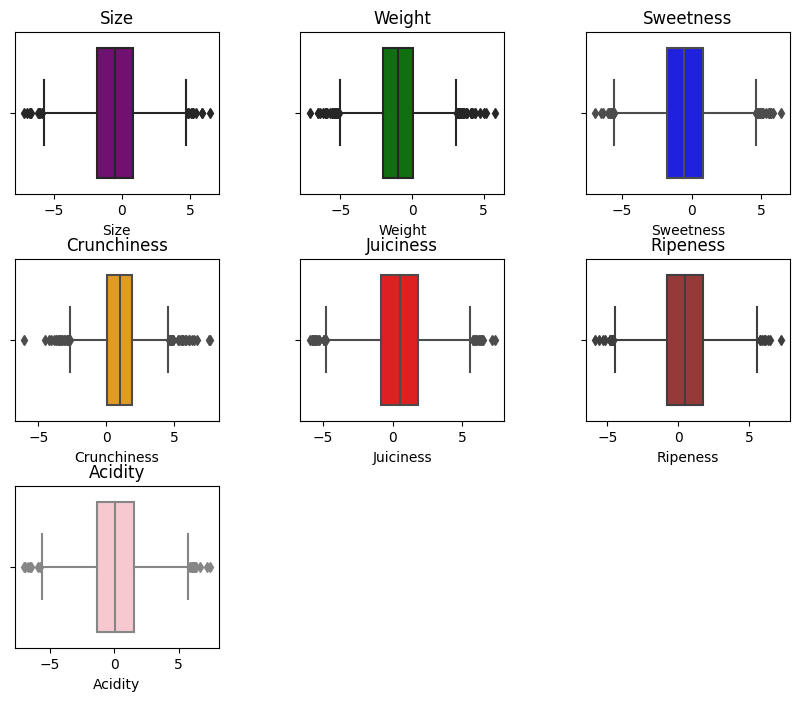

In [26]:
columns = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
colors = ['purple', 'green', 'blue', 'orange', 'red', 'brown', 'pink']

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i, col in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=a, x=col, color=colors[i])
    plt.title(col)

plt.show()

In [27]:
def remove_outliers(ok):
    ok_filtered = pd.DataFrame()

    for column in ok.columns:
        Q1 = ok[column].quantile(0.25)
        Q3 = ok[column].quantile(0.75)
        IQR = Q3 - Q1

        # making a boundary of outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # deleting outlier
        ok_filtered[column] = ok[(ok[column] >= lower_bound) & (ok[column] <= upper_bound)][column]

    return ok_filtered

a_filtered = remove_outliers(a)
a_filtered.shape

(3978, 8)

In [28]:
a_filtered.isnull().sum()

Size            0
Weight         50
Sweetness      31
Crunchiness    46
Juiciness      32
Ripeness       24
Acidity        19
Quality         0
dtype: int64

>### total 3978 data per each columns, so i thought it'd be ok to fill Nan with mean value

In [29]:
def filler_na(x):
    for col in x.columns:
        x.fillna(x[col].mean(), inplace =True)
    
filler_na(a_filtered)
a_filtered.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [30]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
a_filtered_scaled = rs.fit_transform(a_filtered.drop(columns=['Quality']))
a_filtered_scaled = pd.DataFrame(a_filtered_scaled, columns = a_filtered.columns[:-1])

# add col --> 'Quality'
a_filtered_scaled['Quality'] = a_filtered['Quality']
a_filtered_scaled.head(10)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-1.331287,-0.780135,0.000000,-1.093731,0.519810,-0.065333,-0.176541,1.0
1,-0.262500,-0.945476,1.667469,0.332965,0.135138,0.150894,-0.257382,1.0
2,0.085384,-0.192927,-0.494530,-0.726449,0.905304,-0.213269,0.911934,0.0
3,-0.055270,-0.658395,0.731361,-0.592165,1.215385,-1.570781,0.271793,1.0
4,0.723322,-0.165277,0.047230,-0.841886,0.979878,-0.722303,0.170842,1.0
5,-1.121504,-0.222159,-0.564595,-0.843405,-1.690572,0.571968,-1.047095,0.0
6,0.710761,1.317882,0.551717,-1.459035,1.009155,-0.940893,0.839398,1.0
7,-0.570732,0.273543,0.813707,-0.946116,-0.134256,0.193885,-0.518666,1.0
8,-1.291839,-1.398256,0.595920,-1.201077,0.693589,1.443124,-1.708027,0.0
9,-0.082535,0.266532,-1.436484,-0.210621,-0.043141,0.453836,0.759486,0.0


In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
a_filtered_scaled = ss.fit_transform(a_filtered.drop(columns=['Quality']))
a_filtered_scaled = pd.DataFrame(a_filtered_scaled, columns = a_filtered.columns[:-1])

# add col --> 'Quality'
a_filtered_scaled['Quality'] = a_filtered['Quality']
a_filtered_scaled.head(10)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-1.841874,-1.010943,-0.008868,-1.502808,0.723018,-0.092251,-0.269553,1.0
1,-0.367878,-1.228648,2.213525,0.470553,0.189224,0.203141,-0.382013,1.0
2,0.111901,-0.237766,-0.667974,-0.994796,1.257954,-0.294349,1.244656,0.0
3,-0.082080,-0.850648,0.965885,-0.809058,1.688243,-2.148875,0.354138,1.0
4,0.991699,-0.201360,0.054080,-1.154464,1.361438,-0.989751,0.213701,1.0
5,-1.552556,-0.276257,-0.761357,-1.156566,-2.344248,0.778379,-1.480604,0.0
6,0.974376,1.751515,0.726458,-2.008085,1.402064,-1.288371,1.143749,1.0
7,-0.792970,0.376434,1.075635,-1.298632,-0.184606,0.261873,-0.745491,1.0
8,-1.787471,-1.824823,0.785370,-1.651287,0.964165,1.968483,-2.400046,0.0
9,-0.119682,0.367203,-1.923406,-0.281319,-0.058168,0.616996,1.032581,0.0


In [32]:
from sklearn.preprocessing import MinMaxScaler
min_scaler = MinMaxScaler()
a_filtered_scaled = min_scaler.fit_transform(a_filtered.drop(columns=['Quality']))
a_filtered_scaled = pd.DataFrame(a_filtered_scaled, columns = a_filtered.columns[:-1])

# add col --> 'Quality'
a_filtered_scaled['Quality'] = a_filtered['Quality']
a_filtered_scaled.head(10)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.166510,0.312810,0.496893,0.229782,0.637546,0.478933,0.451863,1.0
1,0.434816,0.272649,0.907206,0.587165,0.541782,0.532571,0.431547,1.0
2,0.522149,0.455442,0.375205,0.321785,0.733515,0.442236,0.725412,0.0
3,0.486839,0.342381,0.676858,0.355423,0.810710,0.105487,0.564535,1.0
4,0.682295,0.462158,0.508515,0.292869,0.752080,0.315963,0.539165,1.0
5,0.219173,0.448342,0.357964,0.292488,0.087270,0.637024,0.233081,0.0
6,0.679142,0.822415,0.632654,0.138275,0.759369,0.261739,0.707182,1.0
7,0.357438,0.568747,0.697121,0.266759,0.474716,0.543236,0.365883,1.0
8,0.176413,0.162670,0.643531,0.202893,0.680808,0.853126,0.066980,0.0
9,0.479994,0.567044,0.143418,0.450998,0.497399,0.607720,0.687099,0.0


# let's divide the rest of 8 and quality
# without A_id

In [33]:
a_filtered_scaled['Quality'].isnull().sum()

22

In [34]:
a_filtered_scaled['Quality'].dropna(inplace = True)
a_filtered_scaled.isnull().sum()

Size            0
Weight          0
Sweetness       0
Crunchiness     0
Juiciness       0
Ripeness        0
Acidity         0
Quality        22
dtype: int64

In [35]:
a_filtered_scaled.dropna(inplace = True)
a_filtered_scaled.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

# 3. model(classification)

In [36]:
X, y = a_filtered_scaled.iloc[:, 1:-1], a_filtered_scaled[["Quality"]]
X.shape, y.shape

((3956, 6), (3956, 1))

In [37]:
from sklearn.model_selection import train_test_split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify = y, random_state=2024, test_size = 0.2)
X_tr.shape, X_test.shape, y_tr.shape, y_test.shape

((3164, 6), (792, 6), (3164, 1), (792, 1))

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.svm import SVC # 서포트벡터머신
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier(max_depth = 6, random_state = 2024)
gbc = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 3)
rf = RandomForestClassifier(random_state = 2024)
svc = SVC(kernel='linear', C=1)
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(max_iter=1000)

models = {
    "dtc": dtc,
    "gbc": gbc,
    "rf": rf,
    'svc': svc,
    'knn': knn,
    'lr': lr
}

# model's score
accuracies = []
mean_squared_errors = []
r2_scores = []

for i, m in models.items():
    m.fit(X_tr, y_tr)
    y_pred = m.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    accuracies.append(acc)
    mean_squared_errors.append(mse)
    r2_scores.append(r2)
    print(f"{i} -> Accuracy: {acc}")
    print(f"{i} -> Mean Squared Error: {mse}") # if near 0, it's a good model
    print(f"{i} -> R-squared: {r2}") # if near 1, it's a best explanation

dtc -> Accuracy: 0.4823232323232323
dtc -> Mean Squared Error: 0.5176767676767676
dtc -> R-squared: -1.0707070707070705
gbc -> Accuracy: 0.4772727272727273
gbc -> Mean Squared Error: 0.5227272727272727
gbc -> R-squared: -1.0909090909090908
rf -> Accuracy: 0.5277777777777778
rf -> Mean Squared Error: 0.4722222222222222
rf -> R-squared: -0.8888888888888888
svc -> Accuracy: 0.51010101010101
svc -> Mean Squared Error: 0.4898989898989899
svc -> R-squared: -0.9595959595959596
knn -> Accuracy: 0.5113636363636364
knn -> Mean Squared Error: 0.48863636363636365
knn -> R-squared: -0.9545454545454546
lr -> Accuracy: 0.5088383838383839
lr -> Mean Squared Error: 0.4911616161616162
lr -> R-squared: -0.9646464646464648


# 4. comparison

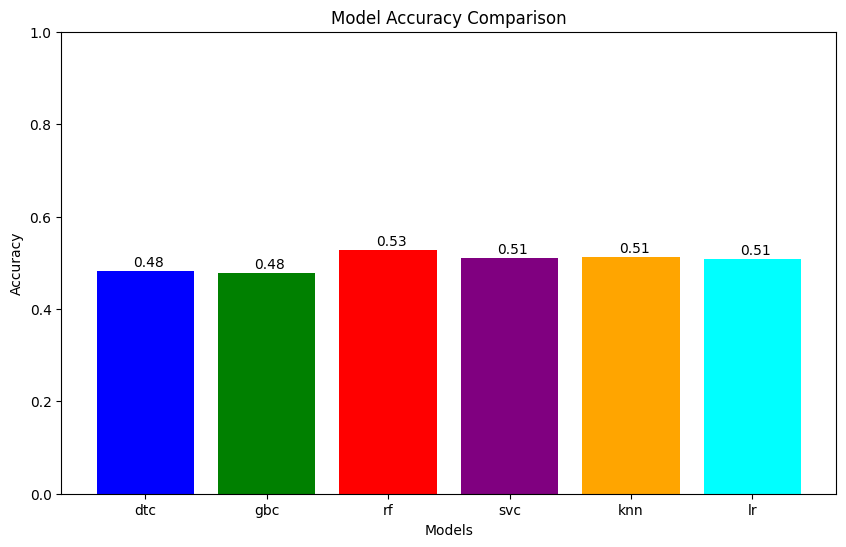

In [41]:
# bar
plt.figure(figsize=(10, 6))
bars = plt.bar(models.keys(), accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  #y axis range

# each accuracies on top of bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{acc:.2f}', fontsize=10)

plt.show()

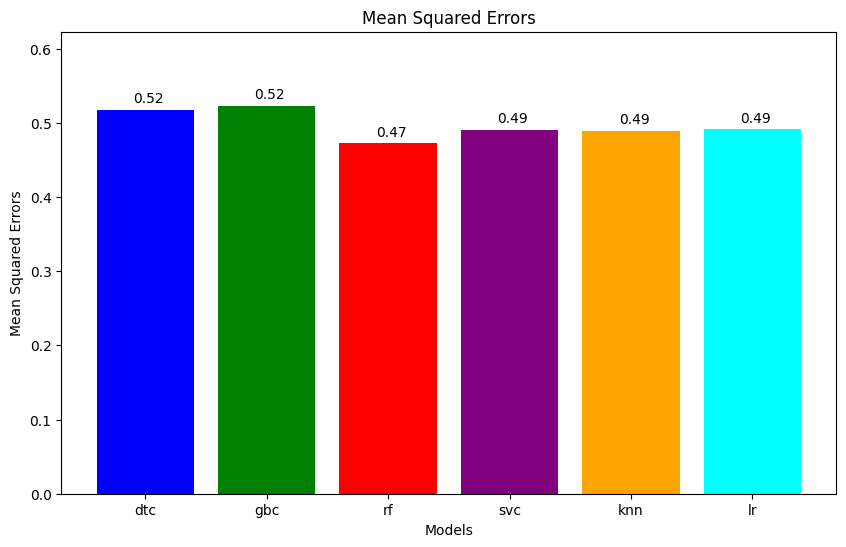

In [81]:
# bar
# mse y axis --> 0~1
plt.figure(figsize=(10, 6))
bars = plt.bar(models.keys(), mean_squared_errors, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.title('Mean Squared Errors')
plt.xlabel('Models')
plt.ylabel('Mean Squared Errors')

# Calculate the appropriate y-axis range based on mean squared errors
y_max = max(mean_squared_errors) + 0.1
plt.ylim(0, y_max)

# Display each mean squared error on top of the bar
for bar, mse in zip(bars, mean_squared_errors):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{mse:.2f}', fontsize=10)

plt.show()

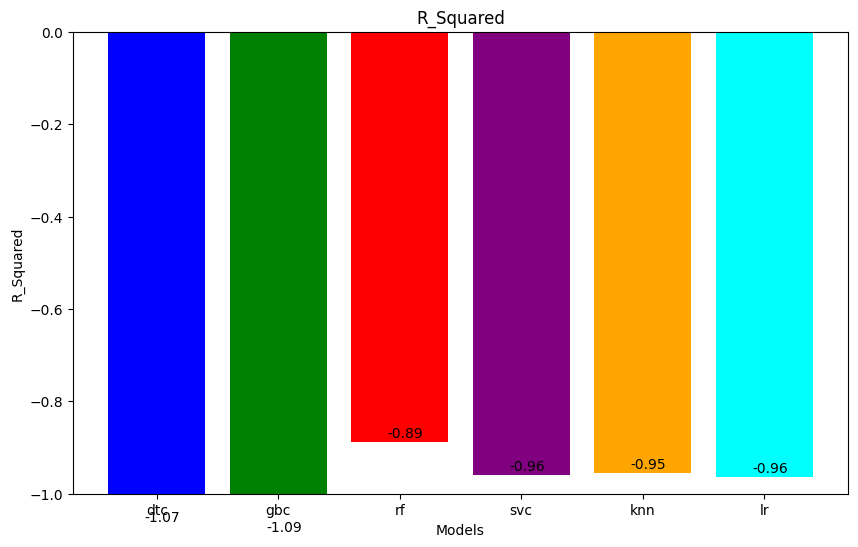

In [83]:
# R_Sqaured
plt.figure(figsize=(10, 6))
bars = plt.bar(models.keys(), r2_scores, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.title('R_Squared')
plt.xlabel('Models')
plt.ylabel('R_Squared')
plt.ylim(-1, 0)  #y axis range

# each accuracies on top of bar
for bar, acc in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{acc:.2f}', fontsize=10)

plt.show()

# 5. let's see how GridSearch works!

In [139]:
from sklearn.model_selection import GridSearchCV

# params setting
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2']}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_tr, y_tr)

# 최적의 하이퍼파라미터 및 결과
# best hyper params and result
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# best m
best_lr= grid_search.best_estimator_

# score on test_set
y_pred = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

# best_iter
best_iter = best_lr.max_iter
print("Best_iter:", best_iter)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Best Accuracy: 0.5041169236306917
Accuracy on Test Set: 0.5050505050505051
Best_iter: 100


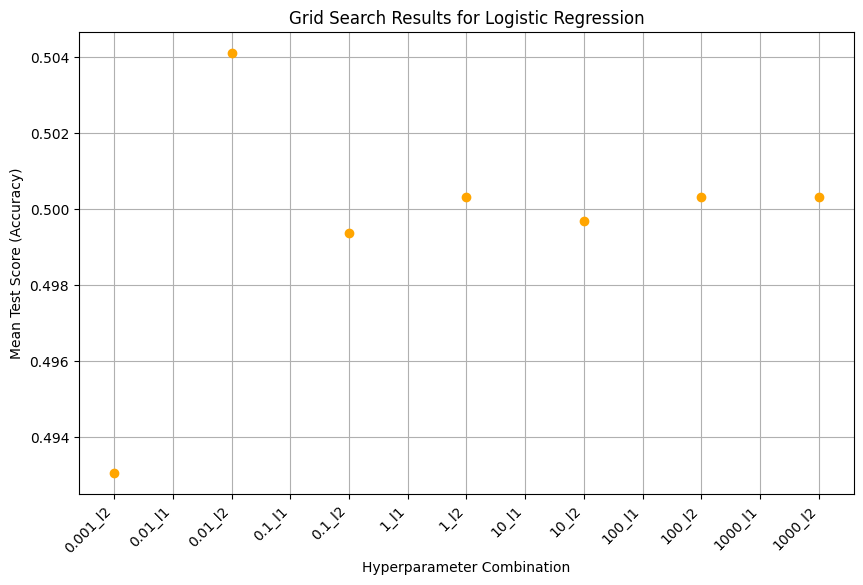

In [138]:
import matplotlib.pyplot as plt
import numpy as np



# grid_search result --> DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# cat(C + penalty)
results['param_str'] = results['param_C'].astype(str) + '_' + results['param_penalty'].astype(str)

c = 'orange'
plt.figure(figsize=(10, 6))
plt.plot(results['param_str'], results['mean_test_score'], marker='o', linestyle='-', color=c)
plt.title('Grid Search Results for Logistic Regression')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Mean Test Score (Accuracy)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()